In [1]:
!pip install torch



In [2]:
!pip install transformers




In [3]:
!pip install datasets scikit-learn matplotlib seaborn bertviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.2 MB/s eta 0:00:00


import torch
print(torch.cuda.is_available())


In [4]:
import torch
print(torch.cuda.is_available())


True


In [5]:
import torch
import matplotlib.pyplot as plt

from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [6]:
dataset = load_dataset("imdb")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [7]:
shuffled = dataset['train'].shuffle(seed=42)

texts = shuffled['text'][:4000]
labels = shuffled['label'][:4000]

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(texts)
y_train = labels

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

print("Logistic Regression trained successfully")

Logistic Regression trained successfully


In [8]:
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

print("BERT loaded successfully")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: bert-base-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.seq_relationship.bias                  | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
classifier.weight                          | MISSING    | 
classifier.bias                            | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


BERT loaded successfully


In [9]:
sentences = [
    "The movie was not bad at all",
    "I thought it would be great, but it wasn't",
    "Absolutely fantastic experience",
    "Terrible plot but great acting"
]

for s in sentences:
    inputs = tokenizer(s, return_tensors="pt")
    outputs = bert_model(**inputs)
    print(s)
    print(outputs.logits)
    print("-----")


The movie was not bad at all
tensor([[-0.2625, -0.4734]], grad_fn=<AddmmBackward0>)
-----
I thought it would be great, but it wasn't
tensor([[-0.3059, -0.3136]], grad_fn=<AddmmBackward0>)
-----
Absolutely fantastic experience
tensor([[-0.2945, -0.4781]], grad_fn=<AddmmBackward0>)
-----
Terrible plot but great acting
tensor([[-0.4413, -0.2352]], grad_fn=<AddmmBackward0>)
-----


In [10]:
import torch

sentences = [
    "The movie was not bad at all",
    "I thought it would be great, but it wasn't",
    "Absolutely fantastic experience",
    "Terrible plot but great acting"
]

labels_map = {0: "Negative", 1: "Positive"}

for s in sentences:
    inputs = tokenizer(s, return_tensors="pt")
    outputs = bert_model(**inputs)

    probs = torch.softmax(outputs.logits, dim=1)
    pred = torch.argmax(probs).item()

    print(f"Sentence: {s}")
    print(f"Prediction: {labels_map[pred]}")
    print(f"Probabilities: {probs.detach().numpy()}")
    print("-----")


Sentence: The movie was not bad at all
Prediction: Negative
Probabilities: [[0.55254346 0.44745657]]
-----
Sentence: I thought it would be great, but it wasn't
Prediction: Negative
Probabilities: [[0.50190663 0.4980934 ]]
-----
Sentence: Absolutely fantastic experience
Prediction: Negative
Probabilities: [[0.54577816 0.45422184]]
-----
Sentence: Terrible plot but great acting
Prediction: Positive
Probabilities: [[0.44866848 0.5513315 ]]
-----


In [11]:
from transformers import BertForSequenceClassification

bert_model = BertForSequenceClassification.from_pretrained(
    "textattack/bert-base-uncased-imdb",
    output_attentions=True # Explicitly enable attention output
)

print("Sentiment BERT loaded")

config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Sentiment BERT loaded


In [12]:
import torch

sentences = [
    "The movie was not bad at all",
    "I thought it would be great, but it wasn't",
    "Absolutely fantastic experience",
    "Terrible plot but great acting",
    "I wouldn't recommend this movie to anyone",
    "The storyline was boring but the visuals were stunning",
    "One of the best movies I have ever watched",
    "It started well but became worse as it went on"
]

labels_map = {0: "Negative", 1: "Positive"}

for s in sentences:
    inputs = tokenizer(s, return_tensors="pt")
    outputs = bert_model(**inputs)

    probs = torch.softmax(outputs.logits, dim=1)
    pred = torch.argmax(probs).item()

    print(f"Sentence: {s}")
    print(f"Prediction: {labels_map[pred]}")
    print(f"Probabilities: {probs.detach().numpy()}")
    print("-----")


Sentence: The movie was not bad at all
Prediction: Positive
Probabilities: [[0.20822161 0.7917784 ]]
-----
Sentence: I thought it would be great, but it wasn't
Prediction: Negative
Probabilities: [[0.99892575 0.00107426]]
-----
Sentence: Absolutely fantastic experience
Prediction: Positive
Probabilities: [[0.00110398 0.998896  ]]
-----
Sentence: Terrible plot but great acting
Prediction: Negative
Probabilities: [[0.99813616 0.00186378]]
-----
Sentence: I wouldn't recommend this movie to anyone
Prediction: Negative
Probabilities: [[0.98071873 0.01928131]]
-----
Sentence: The storyline was boring but the visuals were stunning
Prediction: Positive
Probabilities: [[0.04076215 0.9592379 ]]
-----
Sentence: One of the best movies I have ever watched
Prediction: Positive
Probabilities: [[7.1940239e-04 9.9928063e-01]]
-----
Sentence: It started well but became worse as it went on
Prediction: Negative
Probabilities: [[0.99899715 0.0010029 ]]
-----


In [13]:
import torch
torch.backends.cuda.enable_flash_sdp(False)
torch.backends.cuda.enable_mem_efficient_sdp(False)
torch.backends.cuda.enable_math_sdp(True)


In [14]:
from bertviz import head_view

text = "The movie was not bad at all"
inputs = tokenizer(text, return_tensors='pt')

outputs = bert_model(**inputs, output_attentions=True)

attentions = outputs.attentions
print(f"Attentions: {attentions}") # Debugging line
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

head_view(encoder_attention=attentions, encoder_tokens=tokens)

Attentions: (tensor([[[[7.4066e-02, 1.4744e-01, 3.4931e-02, 4.8285e-02, 7.9996e-02,
           8.3190e-02, 1.3710e-01, 8.3504e-02, 3.1149e-01],
          [1.6109e-01, 1.0378e-01, 6.9345e-02, 1.0343e-01, 1.2110e-01,
           1.1451e-01, 1.1056e-01, 1.0528e-01, 1.1089e-01],
          [6.4180e-02, 1.0012e-01, 1.3034e-01, 9.5561e-02, 1.1139e-01,
           9.3399e-02, 1.2898e-01, 9.8890e-02, 1.7714e-01],
          [2.0865e-01, 3.6555e-02, 6.7688e-02, 1.9741e-01, 1.4517e-01,
           1.0083e-01, 9.6565e-02, 9.0431e-02, 5.6689e-02],
          [1.1391e-01, 6.4578e-02, 1.1559e-01, 1.2307e-01, 9.6798e-02,
           1.1871e-01, 1.3687e-01, 1.0628e-01, 1.2420e-01],
          [2.7040e-01, 1.6415e-02, 1.9228e-01, 1.0347e-01, 1.2374e-01,
           8.0798e-02, 1.0308e-01, 5.1794e-02, 5.8029e-02],
          [1.5002e-01, 5.4656e-02, 1.3559e-01, 1.5677e-01, 1.2688e-01,
           7.5296e-02, 1.4117e-01, 9.0463e-02, 6.9146e-02],
          [1.4691e-01, 9.1502e-02, 5.6543e-02, 1.0019e-01, 1.5071e-01,

<IPython.core.display.Javascript object>

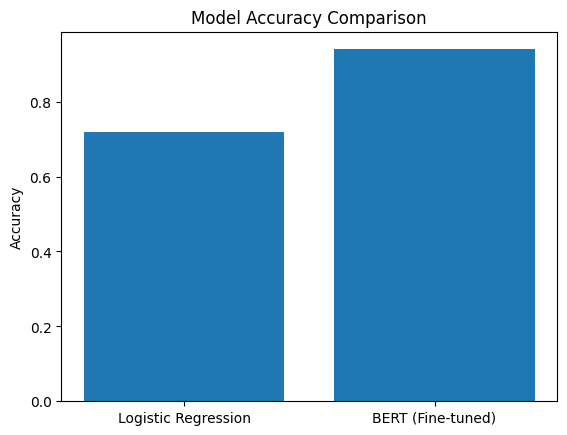

In [15]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'BERT (Fine-tuned)']
accuracy = [0.72, 0.94]

plt.bar(models, accuracy)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
